# ANN Classify 5 classes using Sparse categorical-entropy
- class: horse, bird, fish, cat & dog
- loss: compile(loss='sparse_categorical_crossentropy', .. )

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Dataset

In [4]:
# Gen Dataset 1
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.1, random_state=1)

In [5]:
# Dataset 2
# X, y = make_blobs(n_samples=1000, centers=5, n_features=2, cluster_std=1.8, random_state=1)

In [6]:
X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])

df = pd.concat([X_df, y_df], axis=1)   # 

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat',4:'dog'}  # target (class)
df['class'] = df['class'].map(target_map)

# df.head()
df.sample(5, random_state=100)

,weight,height,class
249,-11.889046,-3.890515,bird
353,-9.501477,-4.717762,bird
537,-3.277917,1.611778,dog
424,-9.297471,-2.403170,bird
564,-2.897847,0.377424,dog


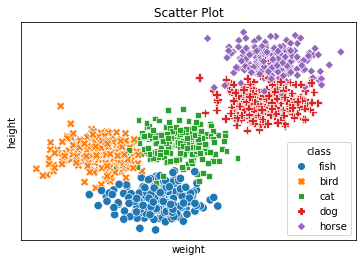

In [7]:
sns.scatterplot(x='weight', y='height', data=df, s=70,
                hue=df['class'], style=df['class'])

plt.title('Scatter Plot')
plt.xticks([])
plt.yticks([])
plt.show()

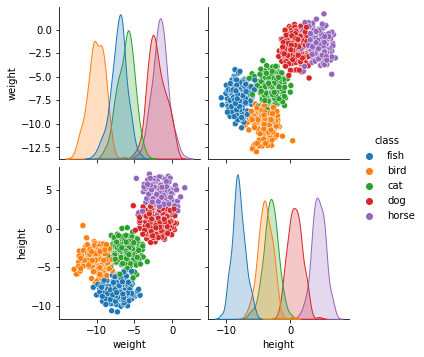

In [8]:
sns.pairplot(df, hue='class')
plt.show()

In [9]:
# Label Encoding
class_names, y = np.unique(df['class'], return_inverse=True)
class_names

array(['bird', 'cat', 'dog', 'fish', 'horse'], dtype=object)

In [10]:
y[:10]

array([3, 0, 1, 1, 2, 2, 3, 2, 2, 2], dtype=int64)

In [11]:
X = df.drop('class', axis=1)
X.head()

,weight,height
0,-7.253467,-7.947597
1,-12.447536,-5.822616
2,-5.973586,-3.275877
3,-5.310976,-2.953204
4,-1.860408,1.477063


In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

array([[-0.5595291 , -1.35408313],
       [-2.10518858, -0.87283448],
       [-0.17865988, -0.29606987],
       [ 0.0185207 , -0.22299352]])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((750, 2), (250, 2))

In [14]:
y_train.shape

(750,)

In [15]:
y_train[:10]

array([1, 2, 3, 3, 4, 0, 2, 4, 3, 2], dtype=int64)

## Model

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

# Case 1
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(2,)))  # features: 2 attributes  # 

model.add(Dense(5, activation='softmax'))  # สำหรับ 5 classes

In [ ]:
# Case 2
# model = Sequential()

# model.add(Dense(100, activation='relu', input_shape=(2,)))  # features: 2 attributes  # 
# model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation='relu'))

# model.add(Dense(5, activation='softmax'))  # สำหรับ 5 classes

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               300       
                                                                 
 dense_3 (Dense)             (None, 5)                 505       
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


## SGD

In [18]:
# No momentum
opt_name = 'SGD No Momentum'

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [31]:
# With momentum
opt_name = 'SGD with Momentum'

import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])

## RMSProp

In [37]:
opt_name = 'RMSProp'

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='RMSprop', 
              metrics=['accuracy'])

## Adam

In [43]:
opt_name = 'Adam'

model.compile(loss='sparse_categorical_crossentropy',    # <<---
             optimizer='adam', 
             metrics=['accuracy'])

## Train & Eval

In [44]:
import time

start = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0, validation_split=0.25) # no1
end = time.time()

print(f"Time Taken {end - start:.2f} secs")

Time Taken 1.72 secs


In [45]:
score = model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", score[0])
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.26366156339645386
Test accuracy: 0.9480


## Results
- SGD without Momentum: accuracy=65 - 75 %
- SGD with Momentum: accuracy=86-97 %
- RMSProp: accuracy=84-95 %
- Adam: accuracy=85-95 %

## Loss and Accuracy Curves

In [46]:
# 2 Columns

def loss_acc_plot():

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)   # row column index
    plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
    plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')
    plt.title('Loss Curve : ' + opt_name)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)   # row column index
    plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
    plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Accuracy Curve : ' + opt_name)
    plt.show()

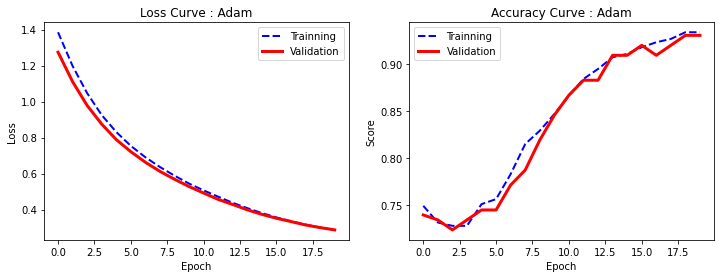

In [47]:
# Loss and Accuracy Plots
loss_acc_plot()     

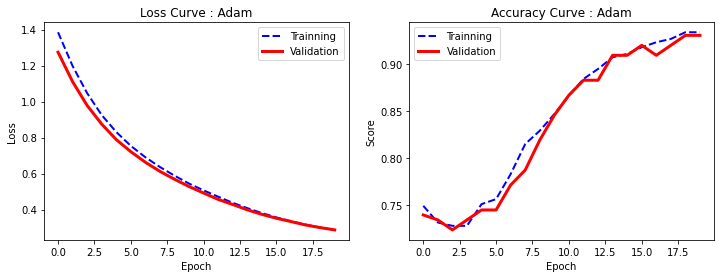

In [48]:
# 2 Columns

# opt_name = model.optimizer.get_config()["name"]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)   # row column index
plt.plot(history.history['loss'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_loss'], c='r', lw=3, label='Validation')
plt.title('Loss Curve : ' + opt_name)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)   # row column index
plt.plot(history.history['accuracy'], '--', c='b', lw=2, label='Trainning')
plt.plot(history.history['val_accuracy'], c='r', lw=3, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.title('Accuracy Curve : ' + opt_name)
plt.show()

## Predict

In [ ]:
y_pred = model.predict(X_test)

y_pred[:4]
y_pred[:4].round(3)

In [ ]:
Image(filename='images/ch11 TF Iris/DL 20220515 121011.png')

In [ ]:
y_pred_cat = np.argmax(y_pred, axis=1)
y_pred_cat[:4]

In [ ]:
class_names[y_pred_cat[:4]]

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_cat)   ## <-- 
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

## Decision Regions **

In [92]:
# return เปลี่ยนผล Predict 5 columns (Propability) -> output class (integer) 
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)    

17496/17496 [==============================] - 25s 1ms/step


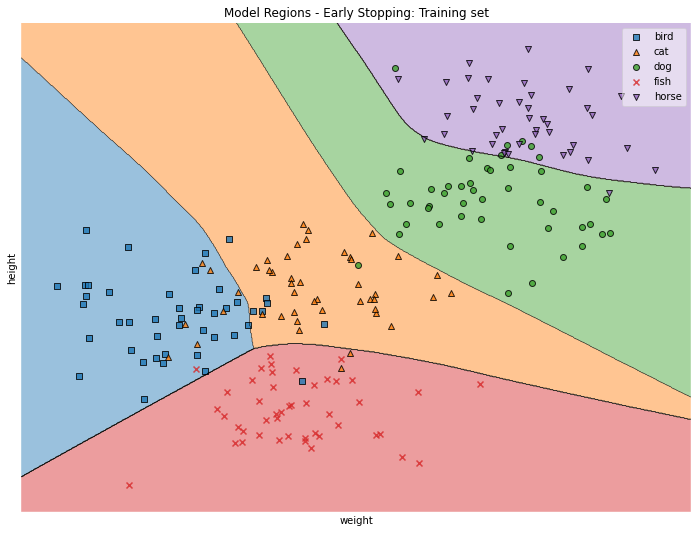

In [93]:
# Training set
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 9))
ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe,
                          zoom_factor=4.)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title(f'Model Regions - {opt_name}: Training set') 
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

17496/17496 [==============================] - 22s 1ms/step


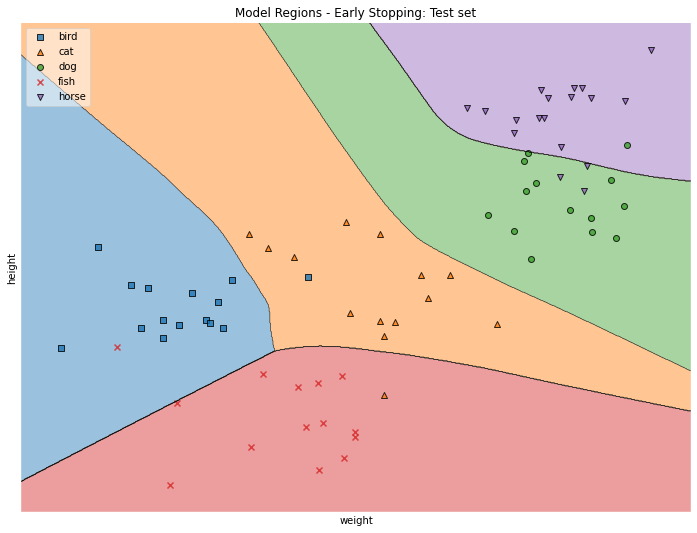

In [94]:
# Test set
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(12, 9))
ax = plot_decision_regions(X_test, y_test, clf=model_no_ohe,
                          zoom_factor=4.)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

# plt.title('Model Regions: Test set') 
plt.title(f'Model Regions - {opt_name}: Test set') 
plt.xticks([])
plt.yticks([])
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [ ]:
# Gen dataset; Features=2
X, y = make_blobs(n_samples=2000, centers=6, n_features=2, cluster_std=1.1, random_state=1)

In [ ]:
# Gen dataset; Features=3
X, y = make_blobs(n_samples=1200, centers=6, n_features=3, cluster_std=1.1, random_state=1)

X_df = pd.DataFrame(X, columns=['weight', 'height', 'feature3'])
y_df = pd.DataFrame(y, columns=['class'])

df = pd.concat([X_df, y_df], axis=1)   # รวม X_df และ y_df เข้าด้วยกัน 

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat',4:'dog', 5:'class5'}  # target (class)
df['class'] = df['class'].map(target_map)

In [ ]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(3,)))  # features: 3 attributes  # 100
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


model.add(Dense(6, activation='softmax'))  # สำหรับ 6 classes

In [ ]:
# สำหรับ 3 features
from mlxtend.plotting import plot_decision_regions

value = 0
width = 5.5

ax = plot_decision_regions(X_test, y_test,
                    clf=model_no_ohe, feature_index=[0, 1],  
                    filler_feature_values={2: value},
                    filler_feature_ranges={2: width},
                    legend=2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Decision Regions')
# plt.xticks([])
plt.yticks([])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

plt.show()

In [ ]:
# PCA (Principal component analysis)  Project datapoints 3 features to 2 มิติ
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_sc)
X_train, X_test,y_train,y_test = train_test_split(X_pca, y, test_size=0.25, random_state=20)  # 20 1

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(2,)))  # features: 2 attributes  # 100
model.add(Dense(64, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',    # <<---
             optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.25) # no1

class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

model_no_ohe = Onehot2Int(model)  

from mlxtend.plotting import plot_decision_regions
ax = plot_decision_regions(X_train, y_train, clf=model_no_ohe,
                          zoom_factor=1.)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5)

plt.title('Model Regions') 
plt.xticks([])
plt.yticks([])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


# Overfitting: Train-test set 
without L1,L2

In [49]:
X, y = make_blobs(n_samples=300, centers=5, n_features=2, cluster_std=1.5, random_state=1)

X_df = pd.DataFrame(X, columns=['weight', 'height'])
y_df = pd.DataFrame(y, columns=['class'])

df = pd.concat([X_df, y_df], axis=1)   # รวม X_df และ y_df เข้าด้วยกัน 

target_map = {0:'horse', 1:'bird', 2:'fish', 3:'cat',4:'dog'}  # target (class)
df['class'] = df['class'].map(target_map)

# Label Encoding
class_names, y = np.unique(df['class'], return_inverse=True)
class_names

# df.head()
df.sample(5, random_state=100)

X = df.drop('class', axis=1)
X.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:4]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=1) #

X_train.shape, X_test.shape

((225, 2), (75, 2))

In [50]:
opt_name = ''
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(2,)))  
model.add(Dense(128, activation='relu'))  # 
model.add(Dense(64, activation='relu'))   # 

model.add(Dense(5, activation='softmax'))

## Compile Train and Eval **

In [83]:
model.compile(loss='sparse_categorical_crossentropy',    # <<---
             optimizer='adam', 
             metrics=['accuracy'])

In [84]:
import time

start = time.time()
history = model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=0, 
                    validation_data=(X_test, y_test)) 
# history = model.fit(X_train, y_train, epochs=1000, batch_size=256, verbose=0, 
#                     validation_split=0.25) 
end = time.time()

print(f"Time Taken {end - start:.2f} secs")

Time Taken 31.91 secs


In [85]:
score = model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", score[0])
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.5311072468757629
Test accuracy: 0.8800


## Loss and Accuracy Curves

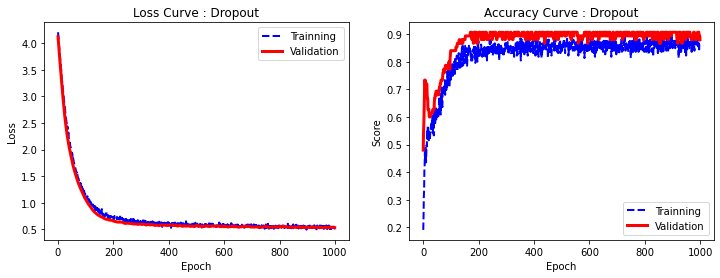

In [86]:
loss_acc_plot()

# Results
- Without Regularization : accuracy=85.33 
- With Regularization L1 : accuracy=89.33 
- With Regularization L2 : accuracy=86.67 
- With Regularization L2 (0.01) : accuracy=90.67
- With Regularization & Dropout : accuracy=90.67

# Regularization: L1

In [58]:
from tensorflow.keras.regularizers import l1, l2, l1_l2
opt_name = 'L1'

model = Sequential()

model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001), input_shape=(2,)))  
model.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))  # 
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))  # 

model.add(Dense(5, activation='softmax'))

# Regularization: L2

In [66]:
model = Sequential()
opt_name = 'L2 .001'

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001), input_shape=(2,)))  # .001
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  

model.add(Dense(5, activation='softmax'))

In [74]:
model = Sequential()
opt_name = 'L2 .01'

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))  #.01
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  #
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # 

model.add(Dense(5, activation='softmax'))

# Dropout

In [82]:
from tensorflow.keras.layers import Dropout

opt_name = 'Dropout'
model = Sequential()

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(2,)))  #.01
model.add(Dropout(.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  #
model.add(Dropout(.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # 
model.add(Dropout(.4))

model.add(Dense(5, activation='softmax'))

# Early Stopping

In [90]:
from tensorflow.keras.callbacks import EarlyStopping
opt_name = 'Early Stopping'

# es = EarlyStopping(monitor='val_loss', verbose=1, patience=20) # 
es = EarlyStopping(monitor='val_loss', verbose=1, patience=5)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # , Dropout

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(2,)))   # 
model.add(Dense(128, activation='relu'))  # 
model.add(Dense(64, activation='relu'))  # 

model.add(Dense(5, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, validation_data=(X_test, y_test), 
                    epochs=1000, verbose=0, callbacks=[es])

Epoch 86: early stopping


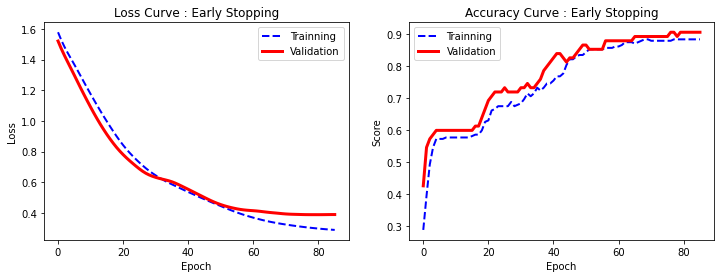

In [91]:
loss_acc_plot()

# ws14

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


es = EarlyStopping(monitor='val_loss', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True) # mode='auto'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()


model.add(Dense(256, activation='relu', input_shape=(2,))) 
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))  

model.add(Dense(5, activation='softmax'))
model.summary()